# Write a Data Science Blog Post

For this project, you will pick a dataset. Inspired by Robert, there are a few public datasets from AirBnB available below, but you may also choose a dataset similar to what was used in the lessons, or an entirely different dataset. Using your dataset, you will choose 3 questions you aspire to answer from the data. <br>
By following the table of contents, you will build out a number of different methods for making recommendations that can be used for different situations. 



## Table of Contents

I. Pick a dataset<br>

II. Pose at least three questions related to business or real-world applications of how the data could be used<br>

III. Create a Jupyter Notebook, using any associated packages you'd like, to:<br>
- Prepare data<br>
- Gather necessary data to answer your questions<br>
- Handle categorical and missing data<br>
- Provide insight into the methods you chose and why you chose them<br>
- Analyze, Model, and Visualize
- Provide a clear connection between your business questions and how the data answers them<br>

IV. Communicate your business insights:<br>
- Create a Github repository to share your code and data wrangling/modeling techniques, with a technical audience in mind<br>
- Create a blog post to share your questions and insights with a non-technical audience<br>


## Business Questions

1. Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Seattle?
2. What are the busiest times of the year to visit Seattle? By how much do prices spike?
3. Understand if there is anything about the properties that helps you predict price.

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

import nltk
# nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

pd.set_option("display.max_columns", None)

path = 'C:\\Sasha\\udacity\\Data Scientist Nanodegree Program\\2 Introduction to Data Science\\3 Project Writing a data Scientist Blog Post'

In [2]:
# Load Seattle datasets

path_seattle_calendar = os.path.join(os.path.join(path, 'Seattle'), 'calendar.csv')
path_seattle_listings = os.path.join(os.path.join(path, 'Seattle'), 'listings.csv')
path_seattle_reviews = os.path.join(os.path.join(path, 'Seattle'), 'reviews.csv')

df_seattle_calendar = pd.read_csv(path_seattle_calendar)
df_seattle_listings = pd.read_csv(path_seattle_listings)
df_seattle_reviews = pd.read_csv(path_seattle_reviews)

print('Seattle datasets shape:')
print('calendar:', df_seattle_calendar.shape)
print('listings:', df_seattle_listings.shape)
print('reviews:', df_seattle_reviews.shape)

df_seattle_calendar.head()

Seattle datasets shape:
calendar: (1393570, 4)
listings: (3818, 92)
reviews: (84849, 6)


listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN

In [3]:
df_seattle_listings.head(2)

id                          listing_url       scrape_id last_scraped  \
0  241032  https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1  953595  https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   

                                 name  \
0        Stylish Queen Anne Apartment   
1  Bright & Airy Queen Anne Apartment   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   

                               neighborhood_overview  \
0                                                NaN   
1  Queen Anne is a wonderful, truly functional vi...   

                                               notes  \
0                                                NaN   
1  What's up with the free pillows?  Our home was...   

                                             transit  \
0                                                NaN   
1  Convenient bus stops are just down the block, ...   

                                       thumbnail_url  \
0                                                NaN   
1  https://a0.muscache.com/ac/pictures/14409893/f...   

                                          medium_url  \
0                                                NaN   
1  https://a0.muscache.com/im/pictures/14409893/f...   

                                         picture_url  \
0  https://a1.muscache.com/ac/pictures/67560560/c...   
1  https://a0.muscache.com/ac/pictures/14409893/f...   

                                      xl_picture_url  host_id  \
0                                                NaN   956883   
1  https://a0.muscache.com/ac/pictures/14409893/f...  5177328   

                                    host_url host_name  host_since  \
0   https://www.airbnb.com/users/show/956883     Maija  2011-08-11   
1  https://www.airbnb.com/users/show/5177328    Andrea  2013-02-21   

                        host_location  \
0  Seattle, Washington, United States   
1  Seattle, Washington, United States   

                                          host_about  host_response_time  \
0  I am an artist, interior designer, and run a s...  within a few hours   
1  Living east coast/left coast/overseas.  Time i...      within an hour   

  host_response_rate host_acceptance_rate host_is_superhost  \
0                96%                 100%                 f   
1                98%                 100%                 t   

                                  host_thumbnail_url  \
0  https://a0.muscache.com/ac/users/956883/profil...   
1  https://a0.muscache.com/ac/users/5177328/profi...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/ac/users/956883/profil...         Queen Anne   
1  https://a0.muscache.com/ac/users/5177328/profi...         Queen Anne   

   host_listings_count  host_total_listings_count  \
0                  3.0                        3.0   
1                  6.0                        6.0   

                                  host_verifications host_has_profile_pic  \
0               ['email', 'phone', 'reviews', 'kba']                    t   
1  ['email', 'phone', 'facebook', 'linkedin', 're...                    t   

  host_identity_verified                                             street  \
0                      t      Gilman Dr W, Seattle, WA 98119, United States   
1                      t  7th Avenue West, Seattle, WA 98119, United States   

  neighbourhood neighbourhood_cleansed neighbourhood_group_cleansed     city  \
0    Quee

In [4]:
df_seattle_reviews.head()

listing_id        id        date  reviewer_id reviewer_name  \
0     7202016  38917982  2015-07-19     28943674        Bianca   
1     7202016  39087409  2015-07-20     32440555         Frank   
2     7202016  39820030  2015-07-26     37722850           Ian   
3     7202016  40813543  2015-08-02     33671805        George   
4     7202016  41986501  2015-08-10     34959538          Ming   

                                            comments  
0  Cute and cozy place. Perfect location to every...  
1  Kelly has a great room in a very central locat...  
2  Very spacious apartment, and in a great neighb...  
3  Close to Seattle Center and all it has to offe...  
4  Kelly was a great host and very accommodating ...

### Prepare listings data

__Examine data__

In [5]:
# Set index - listing_url
df_seattle_listings.set_index('id', inplace=True)
df_seattle_listings.index.name = 'listing_id'

# Look at 1st 3 rows

df_seattle_listings.head(3)

listing_url       scrape_id last_scraped  \
listing_id                                                                      
241032       https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
953595       https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
3308979     https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   

                                           name  \
listing_id                                        
241032             Stylish Queen Anne Apartment   
953595       Bright & Airy Queen Anne Apartment   
3308979     New Modern House-Amazing water view   

                                                      summary  \
listing_id                                                      
241032                                                    NaN   
953595      Chemically sensitive? We've removed the irrita...   
3308979     New modern house built in 2013.  Spectacular s...   

                                                        space  \
listing_id                                                      
241032      Make your self at home in this charming one-be...   
953595      Beautiful, hypoallergenic apartment in an extr...   
3308979     Our house is modern, light and fresh with a wa...   

                                                  description  \
listing_id                                                      
241032      Make your self at home in this charming one-be...   
953595      Chemically sensitive? We've removed the irrita...   
3308979     New modern house built in 2013.  Spectacular s...   

           experiences_offered  \
listing_id                       
241032                    none   
953595                    none   
3308979                   none   

                                        neighborhood_overview  \
listing_id                                                      
241032                                                    NaN   
953595      Queen Anne is a wonderful, truly functional vi...   
3308979     Upper Queen Anne is a charming neighborhood fu...   

                                                        notes  \
listing_id                                                      
241032                                                    NaN   
953595      What's up with the free pillows?  Our home was...   
3308979     Our house is located just 5 short blocks to To...   

                                                      transit  \
listing_id                                                      
241032                                                    NaN   
953595      Convenient bus stops are just down the block, ...   
3308979     A bus stop is just 2 blocks away.   Easy bus a...   

                                                thumbnail_url  \
listing_id                                                      
241032                                                    NaN   
953595      https://a0.muscache.com/ac/pictures/14409893/f...   
3308979                                                   NaN   

                                                   medium_url  \
listing_id                                                      
241032                                                    NaN   
953595      https://a0.muscache.com/im/pictures/14409893/f...   
3308979                                                   NaN   

                                                  picture_url  \
listing_id                                                      
241032      https://a1.muscache.com/ac/pictures/67560560/c...   
953595      https://a0.muscache.com/ac/pictures/14409893/f...   
3308979     https://a2.muscache.com/ac/pictures/b4324e0f-a...   

                                               xl_picture_url   host_id  \
listing_id                                                                
241032                                                    NaN    956883   
953595      https://a0.muscache.com/ac/pictur

In [6]:
# Look at number of non-null values and types of columns

df_seattle_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 241032 to 10208623
Data columns (total 91 columns):
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498 non-null object
host_id                       

In [7]:
# Types of columns in a DataFrame

print('Types of columns in a DataFrame', df_seattle_listings.dtypes.unique(), '\n')
for tp in df_seattle_listings.columns:
    print(tp, df_seattle_listings[tp].dtypes)

Types of columns in a DataFrame [dtype('O') dtype('int64') dtype('float64')] 

listing_url object
scrape_id int64
last_scraped object
name object
summary object
space object
description object
experiences_offered object
neighborhood_overview object
notes object
transit object
thumbnail_url object
medium_url object
picture_url object
xl_picture_url object
host_id int64
host_url object
host_name object
host_since object
host_location object
host_about object
host_response_time object
host_response_rate object
host_acceptance_rate object
host_is_superhost object
host_thumbnail_url object
host_picture_url object
host_neighbourhood object
host_listings_count float64
host_total_listings_count float64
host_verifications object
host_has_profile_pic object
host_identity_verified object
street object
neighbourhood object
neighbourhood_cleansed object
neighbourhood_group_cleansed object
city object
state object
zipcode object
market object
smart_location object
country_code object
country object


__Drop columns__

In [8]:
# Look atcorrelation between columns

corr = df_seattle_listings.drop(['scrape_id', 'license'], axis=1).corr()
corr.style.background_gradient(cmap='coolwarm')

In [9]:
# Drop useless columns (part 1)
# host_total_listings_count and availability_60 correlate > 90% with other columns
# (host_listings_count and availability_90 respectively)

print('Shape before deleting:', df_seattle_listings.shape)

columns_to_drop = ['host_total_listings_count', 'availability_60']
df_seattle_listings.drop(columns_to_drop, axis=1, inplace=True)

print('Shape after deleting:', df_seattle_listings.shape)

Shape before deleting: (3818, 91)
Shape after deleting: (3818, 89)


In [10]:
# Drop useless columns (part 2)
# columns_to_drop have only unique values, therefore these columns does not carry important information

print('Shape before deleting:', df_seattle_listings.shape)

num_rows = df_seattle_listings.shape[0]
columns_to_drop = []
for column in df_seattle_listings.columns:
    columns_to_drop.append(len(df_seattle_listings[column].unique()) != num_rows)

df_seattle_listings = df_seattle_listings.loc[:, columns_to_drop]
print('Shape after deleting:', df_seattle_listings.shape)

Shape before deleting: (3818, 89)
Shape after deleting: (3818, 85)


In [11]:
# Drop useless columns (part 3)
# columns_to_drop have only one value, therefore these columns does not carry important information

print('Shape before deleting:', df_seattle_listings.shape)

columns_to_drop = []
for column in df_seattle_listings.columns:
    columns_to_drop.append(len(df_seattle_listings[column].unique()) != 1)

df_seattle_listings = df_seattle_listings.loc[:, columns_to_drop]
print('Shape after deleting:', df_seattle_listings.shape)

Shape before deleting: (3818, 85)
Shape after deleting: (3818, 74)


In [12]:
# Drop useless columns (part 4)
# columns with more than 50% missing values

percent_mis = df_seattle_listings.isnull().mean().sort_values(ascending=False)
print(percent_mis[percent_mis > .5])

print('Shape before deleting:', df_seattle_listings.shape)

columns_to_drop = percent_mis[percent_mis > .5].index.tolist()

df_seattle_listings.drop(columns_to_drop, axis=1, inplace=True)
print('Shape after deleting:', df_seattle_listings.shape)

square_feet         0.974594
monthly_price       0.602672
security_deposit    0.511262
dtype: float64
Shape before deleting: (3818, 74)
Shape after deleting: (3818, 71)


In [13]:
# Drop useless columns (part 5)
# state column has 2 values 'WA' and 'wa', so this column can be dropped

print(df_seattle_listings.state.unique())

print('Shape before deleting:', df_seattle_listings.shape)

df_seattle_listings.drop('state', axis=1, inplace=True)
print('Shape after deleting:', df_seattle_listings.shape)

['WA' 'wa']
Shape before deleting: (3818, 71)
Shape after deleting: (3818, 70)


In [14]:
# Drop useless columns (part 6)
# The following data won't be used for this project

print('Shape before deleting:', df_seattle_listings.shape)

cols_to_drop = (['host_name', 'thumbnail_url', 'medium_url', 'xl_picture_url', 'host_thumbnail_url',
                 'host_picture_url', 'description', 'name', 'host_id', 'host_url','host_location',
                 'host_response_time', 'host_neighbourhood', 'neighbourhood', 'neighbourhood_cleansed',
                 'neighbourhood_group_cleansed'])

df_seattle_listings.drop(cols_to_drop, axis=1, inplace=True)
print('Shape after deleting:', df_seattle_listings.shape)

Shape before deleting: (3818, 70)
Shape after deleting: (3818, 54)


In [15]:
# After all column drops in dataset left:

len(df_seattle_listings.columns)

54

__Datetime columns__

In [16]:
# Convert to datetime columns

datetime_lst = ['host_since', 'first_review', 'last_review']

for col in datetime_lst:
    df_seattle_listings[col] = pd.to_datetime(df_seattle_listings[col])
    df_seattle_listings[col].fillna(df_seattle_listings[col].mode().values[0], inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


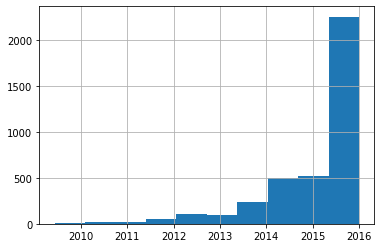

In [17]:
df_seattle_listings['first_review'].hist()

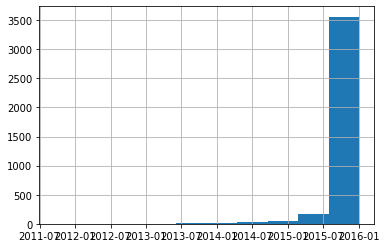

In [18]:
df_seattle_listings['last_review'].hist()

In [19]:
# Calculate number of days between first_review and last_review

df_seattle_listings['days_1_to_last_review'] = (df_seattle_listings.last_review -
                                                             df_seattle_listings.first_review).dt.days
df_seattle_listings.drop(['first_review', 'last_review'], axis=1, inplace=True)

__Boolean columns__

In [20]:
# Columns with 't' and 'f' instead of True and False

lst_booleans = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact',
                'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification']

for col in lst_booleans:
    print(col, df_seattle_listings[col].unique())
    df_seattle_listings[col] = df_seattle_listings[col].replace('t', True).replace('f', False)
    print('NaNs:', df_seattle_listings[col].isnull().sum())
    df_seattle_listings.dropna(subset=[col], axis=0, inplace=True)

host_is_superhost ['f' 't' nan]
NaNs: 2
host_has_profile_pic ['t' 'f']
NaNs: 0
host_identity_verified ['t' 'f']
NaNs: 0
is_location_exact ['t' 'f']
NaNs: 0
instant_bookable ['f' 't']
NaNs: 0
require_guest_profile_picture ['f' 't']
NaNs: 0
require_guest_phone_verification ['f' 't']
NaNs: 0


__Numerical columns with object type__

In [21]:
# Replace long text with 1 and 0, where 1 means that text was present (e.g., someone's left a comment)

cols_to_replace = ['summary', 'space', 'neighborhood_overview', 'notes', 'transit', 'host_about']
for col in cols_to_replace:
    df_seattle_listings[col] = np.where(df_seattle_listings[col].isnull(), 0, 1)

In [22]:
# Convert strings to percentages (host_response_rate, host_acceptance_rate) and numbers (prics, fees, etc.)

# Percentages
df_seattle_listings.host_response_rate = df_seattle_listings.host_response_rate.str.replace('%', '').astype(float) / 100
df_seattle_listings.host_acceptance_rate = df_seattle_listings.host_acceptance_rate.str.replace('%', '').astype(float) / 100

# Remove $ from numbers
cols = ['price', 'weekly_price', 'cleaning_fee', 'extra_people']
for col in cols:
    df_seattle_listings[col] = df_seattle_listings[col].str.replace('$', '')
    df_seattle_listings[col] = df_seattle_listings[col].str.replace(',', '')
    df_seattle_listings[col] = pd.to_numeric(df_seattle_listings[col])

num_cols = df_seattle_listings.select_dtypes(include=['float', 'int', 'int64']).columns

__Missing Values__

Weekly price has 1809 (47%) missing values. It's quite a huge number, since almost a half doesn't have weekly price. There could several hypotethis why it's so.

First, I tried to check whether a long-term bookings don't have weekly price. (This I've found here:<br> https://community.withairbnb.com/t5/Help/Can-a-guest-pay-weekly-for-a-month-s-stay/td-p/392971)<br>
To check this I compared min and max nights. I've received the following results:<br>
Minimum value for minimum_nights and maximum_nights was 1 day. And maximum values for minimum_nights and maximum_nights were 1000 days and 1825 days respectively. This results didn't allow me to conclude that missing values could be replaced with zeros, for example.

Second, I thought it's possible that weekly price isn't an obligatory field in an advertisements, and maybe that why there're a lot of missing values.

Finally, I decided not to use weekly price as a source of any price, but just as boolean (1 == True, 0 == False). So, next weekly_price will indicate whether it was filled in or not.

In [23]:
print('weekly_price\'s missings:', df_seattle_listings.weekly_price.isnull().sum())
df_seattle_listings['weekly_price'] = np.where(df_seattle_listings['weekly_price'].isnull(), 0, 1)

weekly_price's missings: 1809


The same situation with cleaning fee. There are 1029 (27%) missing values.<br>
I replaced this column with boolean one where 1 means cleaning fee present in dataset, and 0 - doesn't. 

In [24]:
print('cleaning_fee\'s missings:', df_seattle_listings.cleaning_fee.isnull().sum())
df_seattle_listings['cleaning_fee'] = np.where(df_seattle_listings['cleaning_fee'].isnull(), 0, 1)

cleaning_fee's missings: 1029


The next thing made me think. Columns with review scores (8 pieces) have +-650 missing values in the raw dataset. These omissions are due to the fact that the value in the number_of_reviews column is zero for them. And accordingly, there are simply no review scores. Filling all these missing values with mean, mode or median seems illogical. At the same time, if the gaps are filled with zeros, a very high correlation arises between these 8 columns. Therefore, in the end, I left only one column review_scores_rating.

In [25]:
# Numerical columns with missing values (part 1)

cols_to_replace = (['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                    'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                    'review_scores_value', 'reviews_per_month'])

for column in cols_to_replace:
    mis = df_seattle_listings[column].isnull().sum()
    df_seattle_listings[column].fillna(-1, inplace=True)
    print(column, 'has', mis)

review_scores_rating has 645
review_scores_accuracy has 656
review_scores_cleanliness has 651
review_scores_checkin has 656
review_scores_communication has 649
review_scores_location has 653
review_scores_value has 654
reviews_per_month has 625


In [26]:
# Numerical columns with missing values (part 2)

df_seattle_listings[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                    'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                    'review_scores_value', 'reviews_per_month']].corr()

review_scores_rating  review_scores_accuracy  \
review_scores_rating                     1.000000                0.980396   
review_scores_accuracy                   0.980396                1.000000   
review_scores_cleanliness                0.983953                0.982354   
review_scores_checkin                    0.978999                0.985902   
review_scores_communication              0.985894                0.982469   
review_scores_location                   0.977536                0.981085   
review_scores_value                      0.983094                0.984623   
reviews_per_month                        0.569876                0.576610   

                             review_scores_cleanliness  review_scores_checkin  \
review_scores_rating                          0.983953               0.978999   
review_scores_accuracy                        0.982354               0.985902   
review_scores_cleanliness                     1.000000               0.980019   
review_scores_checkin                         0.980019               1.000000   
review_scores_communication                   0.982756               0.989167   
review_scores_location                        0.975332               0.982827   
review_scores_value                           0.979173               0.982197   
reviews_per_month                             0.576451               0.573498   

                             review_scores_communication  \
review_scores_rating                            0.985894   
review_scores_accuracy                          0.982469   
review_scores_cleanliness                       0.982756   
review_scores_checkin                           0.989167   
review_scores_communication                     1.000000   
review_scores_location                          0.984214   
review_scores_value                             0.983578   
reviews_per_month                               0.571994   

                             review_scores_location  review_scores_value  \
review_scores_rating                       0.977536             0.983094   
review_scores_accuracy                     0.981085             0.984623   
review_scores_cleanliness                  0.975332             0.979173   
review_scores_checkin                      0.982827             0.982197   
review_scores_communication                0.984214             0.983578   
review_scores_location                     1.000000             0.983295   
review_scores_value                        0.983295             1.000000   
reviews_per_month                          0.566269             0.574229   

                             reviews_per_month  
review_scores_rating                  0.569876  
review_scores_accuracy                0.576610  
review_scores_cleanliness             0.576451  
review_scores_checkin                 0.573498  
review_scores_communication           0.571994  
review_scores_location                0.566269  
review_scores_value                   0.574229  
reviews_per_month                     1.000000

In [27]:
# Numerical columns with missing values (part 3)

df_seattle_listings.drop(['review_scores_accuracy', 'review_scores_cleanliness',
                    'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                    'review_scores_value'], axis=1, inplace=True)

In [28]:
# Numerical columns with missing values

for column in df_seattle_listings.columns:
    mis = df_seattle_listings[column].isnull().sum()
    if (mis > 0) and (column in num_cols):
        print(column, 'has', mis)
        avg = df_seattle_listings[column].mean()
        df_seattle_listings[column].fillna(avg, inplace=True)

host_response_rate has 521
host_acceptance_rate has 771
bathrooms has 16
bedrooms has 6
beds has 1


In [29]:
# Fill NaN in zipcode column
# I tried to find zipcode using address, but in 4 cases I failed

# Type of zipcode column
print('Columns type:', type(df_seattle_listings.zipcode.loc[241032]))
print('Number of mis:', df_seattle_listings.zipcode.isnull().sum())
print('unique zipcodes:', df_seattle_listings.zipcode.unique())

print('\nMissing zipcodes before changes:')
[print(i) for i in df_seattle_listings[df_seattle_listings.zipcode.isnull()]['street'].tolist()]


#Replace zipcodes using column street info about address
idx_14Ave = df_seattle_listings[df_seattle_listings.street == '14th Avenue West, Seattle, WA, United States'].index[0]
df_seattle_listings.at[idx_14Ave, 'zipcode'] = '98119'

idx_30Ave = df_seattle_listings[df_seattle_listings.street == '-30th. Ave., Seattle, WA, United States'].index[0]
df_seattle_listings.at[idx_30Ave, 'zipcode'] = '98122'

idx_harv = df_seattle_listings[df_seattle_listings.street == 'Harvard Avenue East, Seattle, WA, United States'].index[0]
df_seattle_listings.at[idx_harv, 'zipcode'] = '98102'


# Replace last 4 cases with mode
df_seattle_listings.zipcode.fillna(df_seattle_listings.zipcode.mode().values[0], inplace=True)

print('\nMissing zipcodes after changes:')
print(df_seattle_listings.zipcode.isnull().sum())

Columns type: <class 'str'>
Number of mis: 7
unique zipcodes: ['98119' '98109' '98107' '98117' nan '98103' '98105' '98115' '98101'
 '98122' '98112' '98144' '99\n98122' '98121' '98102' '98199' '98104'
 '98134' '98136' '98126' '98146' '98116' '98177' '98118' '98108' '98133'
 '98106' '98178' '98125']

Missing zipcodes before changes:
Seattle, WA, United States
14th Avenue West, Seattle, WA, United States
-30th. Ave., Seattle, WA, United States
Seattle, WA, United States
Seattle, WA, United States
Harvard Avenue East, Seattle, WA, United States
Seattle, WA, United States

Missing zipcodes after changes:
0


In [30]:
# Check, whether missing columns left

for i in df_seattle_listings.columns:
    n = df_seattle_listings[i].isnull().sum()
    if n > 0:
        print(i, n)

property_type 1


With 5 column above (last with NaNs) we will deal in next Dummies section.

__Dummies__

In [31]:
# City and location columns (streamline districts)
# drop smart_location column and prepare city column for creating dummies

# Rename Seattle when it's been written differently
df_seattle_listings.city = (df_seattle_listings.city.replace('西雅图', 'Seattle').replace('Seattle ', 'Seattle')
                        .replace('seattle', 'Seattle'))
print(df_seattle_listings.city.unique())

# Drop smart_location since smart_location & city means the same
print((pd.crosstab(df_seattle_listings.city, df_seattle_listings.smart_location) > 0).sum())
df_seattle_listings.drop('smart_location', axis=1, inplace=True)

['Seattle' 'Ballard, Seattle' 'West Seattle' 'Phinney Ridge Seattle']
smart_location
Ballard, Seattle, WA         1
Phinney Ridge Seattle, WA    1
Seattle , WA                 1
Seattle, WA                  1
West Seattle, WA             1
seattle, wa                  1
西雅图, WA                      1
dtype: int64


In [32]:
# Create new columns (dummies from dummies list)

print('Missing values:', df_seattle_listings[['city', 'property_type', 'room_type', 'bed_type',
                                              'calendar_updated', 'cancellation_policy']].isnull().sum())

# Drop row with missing value in property_type column
df_seattle_listings.dropna(subset=['property_type'], axis=0, inplace=True)

dummies = ['city', 'property_type', 'room_type', 'bed_type', 'calendar_updated', 'cancellation_policy']
for col in dummies:
    df_seattle_listings = (pd.concat([df_seattle_listings.drop(col, axis=1), pd.get_dummies(
                                df_seattle_listings[col], drop_first=True)], axis=1))

df_seattle_listings.shape

Missing values: city                   0
property_type          1
room_type              0
bed_type               0
calendar_updated       0
cancellation_policy    0
dtype: int64


(3815, 99)

In [33]:
# Split columns which could be splitted, and then create dummies from these column values

# Create dummies from host_verifications column
host_verif_ = (df_seattle_listings.host_verifications.str.replace('[', '').str.replace(']', '').str.replace("'", '')
         .str.replace(",", '').str.strip().str.split(expand=True))
df_seattle_listings = pd.merge(df_seattle_listings, pd.get_dummies(host_verif_.apply(pd.Series).stack())
         .sum(level=0), how='outer', left_index=True, right_index=True)


# Desided not to use addresses, since there's 1266 unique values in street column
print('Unique addresses:', len(df_seattle_listings.street.str.split(expand=True, pat=', Seattle, WA')
                               .loc[:, 0].unique()))
# street_ = df_seattle_listings.street.str.split(expand=True, pat=', Seattle, WA').loc[:, 0]
# df_seattle_listings = pd.merge(df_seattle_listings, pd.get_dummies(street_.apply(pd.Series).stack())
#                                .sum(level=0), how='outer', left_index=True, right_index=True)

# Create dummies from amenities column
amenities_ = (df_seattle_listings.amenities.str.replace('{', '').str.replace('}', '').str.replace('"', '')
                     .str.strip().str.split(expand=True, pat=','))
pd.merge(df_seattle_listings, pd.get_dummies(amenities_.apply(pd.Series).stack())
         .sum(level=0), how='outer', left_index=True, right_index=True)


df_seattle_listings.drop(['host_verifications', 'street', 'amenities'], axis=1, inplace=True)
df_seattle_listings.dropna(axis=1, inplace=True)
df_seattle_listings.shape

Unique addresses: 1266


(3815, 96)

__Numerical, categorical, datetime, and booleans dtypes in dataset__

In [34]:
# Numerical, boolean, datetime, and categorical columns

num_cols = df_seattle_listings.select_dtypes(include=['float', 'int', 'int64']).columns
bool_cols = df_seattle_listings.select_dtypes(include=['bool']).columns
cat_cols = df_seattle_listings.select_dtypes(include=['object']).columns
date_cols = df_seattle_listings.select_dtypes(include=['datetime']).columns

print('Number of numerical columns:', len(num_cols))
print('Number of booleans columns:', len(bool_cols))
print('Number of categorical columns:', len(cat_cols))
print('And number of datetime columns:', len(date_cols))

print('\nNumerical columns:\n', num_cols)
print('\nBooleans columns:\n', bool_cols)
print('\nCategorical columns:\n', cat_cols)
print('\nDatetime columns:\n', date_cols)

Number of numerical columns: 28
Number of booleans columns: 6
Number of categorical columns: 2
And number of datetime columns: 1

Numerical columns:
 Index(['summary', 'space', 'neighborhood_overview', 'notes', 'transit',
       'host_about', 'host_response_rate', 'host_acceptance_rate',
       'host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'price', 'weekly_price', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'calculated_host_listings_count',
       'reviews_per_month', 'days_1_to_last_review'],
      dtype='object')

Booleans columns:
 Index(['host_has_profile_pic', 'host_identity_verified', 'is_location_exact',
       'instant_bookable', 'require_guest_profile_picture',
       'require_guest_phone_verification'],
      dtype='object')

Categorical columns:
 Index(['host_is_superhost', 'zip

__Final manipulations__

In [35]:
# Clean column names and look at top3 of final DataFrame

def clean_header_column(x):
    # print(x)
    return str(x).replace('/', '').strip().replace(' ', '_')

df_seattle_listings.columns = list(map(clean_header_column, df_seattle_listings.columns))
print('Shape:', df_seattle_listings.shape)

df_seattle_listings.head()

Shape: (3815, 96)


summary  space  neighborhood_overview  notes  transit host_since  \
listing_id                                                                     
4291              0      1                      0      0        0 2009-09-02   
5682              1      1                      0      1        1 2009-03-03   
6606              0      1                      1      1        0 2009-04-26   
7369              1      1                      1      1        1 2009-05-30   
9419              1      1                      1      1        1 2009-08-09   

            host_about  host_response_rate  host_acceptance_rate  \
listing_id                                                         
4291                 1            1.000000              1.000000   
5682                 1            1.000000              1.000000   
6606                 1            0.900000              1.000000   
7369                 1            0.948868              0.999672   
9419                 1            1.000000              1.000000   

           host_is_superhost  host_listings_count  host_has_profile_pic  \
listing_id                                                                
4291                   False                  6.0                  True   
5682                   False                  1.0                  True   
6606                   False                  3.0                  True   
7369                   False                  1.0                  True   
9419                   False                  5.0                  True   

            host_identity_verified zipcode  is_location_exact  accommodates  \
listing_id                                                                    
4291                          True   98115              False             2   
5682                          True   98106               True             2   
6606                          True   98103               True             2   
7369                         False   98122               True             2   
9419                          True   98108               True             2   

            bathrooms  bedrooms  beds  price  weekly_price  cleaning_fee  \
listing_id                                                                 
4291              1.0       1.0   1.0   82.0             1             1   
5682              1.0       1.0   1.0   48.0             1             1   
6606              1.0       1.0   1.0   90.0             1             1   
7369              1.0       1.0   1.0   85.0             0             0   
9419              3.0       1.0   1.0   90.0             1             0   

            guests_included  extra_people  minimum_nights  maximum_nights  \
listing_id                                                                  
4291                      1           0.0               2              60   
5682                      1           5.0               3              28   
6606                      2          10.0               2            1125   
7369                      1           0.0               1            1125   
9419                      1          10.0               2              30   

            availability_30  availability_90  availability_365  \
listing_id                                                       
4291                     30               90               365   
5682                     12               46               309   
6606                     30               90               365   
7369                      3               53                53   
9419                     30               90               365   

            number_of_reviews  review_scores_rating  instant_bookable  \
listing_id                                                              
4291                       35                  92.0             False   
5682                      297                  96.0              True   
6606                       52                  93.0             Fa

### Prepare calendar data

__Examine data__

In [36]:
# Set index - listing_url
df_seattle_calendar.set_index('listing_id', inplace=True)

# Look at 1st 5 rows
df_seattle_calendar.head()

date available   price
listing_id                              
241032      2016-01-04         t  $85.00
241032      2016-01-05         t  $85.00
241032      2016-01-06         f     NaN
241032      2016-01-07         f     NaN
241032      2016-01-08         f     NaN

In [37]:
# Look at number of non-null values and types of columns

df_seattle_calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393570 entries, 241032 to 10208623
Data columns (total 3 columns):
date         1393570 non-null object
available    1393570 non-null object
price        934542 non-null object
dtypes: object(3)
memory usage: 42.5+ MB


In [38]:
# Types of columns in a DataFrame

print('Types of columns in a DataFrame', df_seattle_calendar.dtypes.unique(), '\n')
for tp in df_seattle_calendar.columns:
    print(tp, df_seattle_calendar[tp].dtypes)

Types of columns in a DataFrame [dtype('O')] 

date object
available object
price object


__Datetime columns__

In [39]:
# Make date column as datetime

df_seattle_calendar['date'] = pd.to_datetime(df_seattle_calendar['date'])
df_seattle_calendar.rename(columns={'date': 'calendar_date'}, inplace=True)
print('NaNs:', df_seattle_calendar['calendar_date'].isnull().sum())

NaNs: 0


In [40]:
df_seattle_calendar['calendar_date'].min(), df_seattle_calendar['calendar_date'].max()

(Timestamp('2016-01-04 00:00:00'), Timestamp('2017-01-02 00:00:00'))

__Boolean columns__

In [41]:
# Columns with 't' and 'f' instead of True and False

print('available', df_seattle_calendar['available'].unique())
df_seattle_calendar['available'] = df_seattle_calendar['available'].replace('t', True).replace('f', False)
print('NaNs:', df_seattle_calendar['available'].isnull().sum())

available ['t' 'f']
NaNs: 0


__Numerical columns with object type__

In [42]:
# Convert strings to percentages (host_response_rate, host_acceptance_rate) and numbers (prics, fees, etc.)

# Remove $ from numbers
df_seattle_calendar['price'] = df_seattle_calendar['price'].str.replace('$', '').str.replace(',', '')
df_seattle_calendar['price'] = pd.to_numeric(df_seattle_calendar['price'])

In [43]:
# Replace NaNs with median

print('NaNs:', df_seattle_calendar['price'].isnull().sum())
df_seattle_calendar.price.fillna(0, inplace=True)
df_seattle_calendar.rename(columns={'price': 'calendar_price'}, inplace=True)

NaNs: 459028


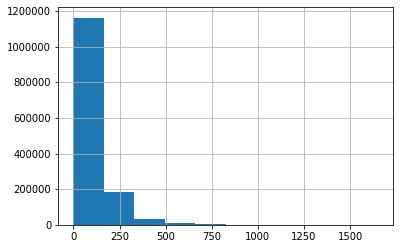

In [44]:
df_seattle_calendar.calendar_price.hist()

In [45]:
# Final calendar dataset

df_seattle_calendar.head()

calendar_date  available  calendar_price
listing_id                                         
241032        2016-01-04       True            85.0
241032        2016-01-05       True            85.0
241032        2016-01-06      False             0.0
241032        2016-01-07      False             0.0
241032        2016-01-08      False             0.0

### Prepare reviews data

__Examine data__

In [46]:
# Set index - listing_url
df_seattle_reviews.set_index('listing_id', inplace=True)

# reviews shape
print('Shape', df_seattle_reviews.shape)

# Look at 1st 5 rows
df_seattle_reviews.head()

Shape (84849, 5)


id        date  reviewer_id reviewer_name  \
listing_id                                                    
7202016     38917982  2015-07-19     28943674        Bianca   
7202016     39087409  2015-07-20     32440555         Frank   
7202016     39820030  2015-07-26     37722850           Ian   
7202016     40813543  2015-08-02     33671805        George   
7202016     41986501  2015-08-10     34959538          Ming   

                                                     comments  
listing_id                                                     
7202016     Cute and cozy place. Perfect location to every...  
7202016     Kelly has a great room in a very central locat...  
7202016     Very spacious apartment, and in a great neighb...  
7202016     Close to Seattle Center and all it has to offe...  
7202016     Kelly was a great host and very accommodating ...

In [47]:
# Look at number of non-null values and types of columns

df_seattle_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84849 entries, 7202016 to 9727246
Data columns (total 5 columns):
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(2), object(3)
memory usage: 3.9+ MB


In [48]:
# Types of columns in a DataFrame

print('Types of columns in a DataFrame', df_seattle_reviews.dtypes.unique(), '\n')
for tp in df_seattle_reviews.columns:
    print(tp, df_seattle_reviews[tp].dtypes)

Types of columns in a DataFrame [dtype('int64') dtype('O')] 

id int64
date object
reviewer_id int64
reviewer_name object
comments object


__Datetime columns__

In [49]:
# Make date column as datetime

df_seattle_reviews['date'] = pd.to_datetime(df_seattle_reviews['date'])
df_seattle_reviews.rename(columns={'date': 'review_date'}, inplace=True)
print('NaNs:', df_seattle_reviews['review_date'].isnull().sum())

NaNs: 0


In [50]:
df_seattle_reviews['review_date'].min(), df_seattle_reviews['review_date'].max()

(Timestamp('2009-06-07 00:00:00'), Timestamp('2016-01-03 00:00:00'))

__Drop columns__

In [51]:
# columns_to_drop have only unique values, therefore these columns does not carry important information

print('Shape before deleting:', df_seattle_reviews.shape)

columns_to_drop = ['id', 'reviewer_name']
df_seattle_reviews.drop(columns_to_drop, axis=1, inplace=True)

print('Shape after deleting:', df_seattle_reviews.shape)

Shape before deleting: (84849, 5)
Shape after deleting: (84849, 3)


__Create matrix with dummies from comments column and remove stop words__

In [52]:
df_seattle_reviews.head()

review_date  reviewer_id  \
listing_id                            
7202016     2015-07-19     28943674   
7202016     2015-07-20     32440555   
7202016     2015-07-26     37722850   
7202016     2015-08-02     33671805   
7202016     2015-08-10     34959538   

                                                     comments  
listing_id                                                     
7202016     Cute and cozy place. Perfect location to every...  
7202016     Kelly has a great room in a very central locat...  
7202016     Very spacious apartment, and in a great neighb...  
7202016     Close to Seattle Center and all it has to offe...  
7202016     Kelly was a great host and very accommodating ...

The following transformations with comments columns were made thanks to Soledad Galli, "Python Feature Engineering Cookbook: Over 70 recipes for creating, engineering, and transforming features to build machine learning models", 2020

https://www.amazon.com/Python-Feature-Engineering-Cookbook-transforming-ebook/dp/B083WHTMRP

In [53]:
# Clean and prepare comments column

df_seattle_reviews['comments'] = df_seattle_reviews['comments'].astype(str)

# Delete punctuation and numbers
df_seattle_reviews['comments'] = df_seattle_reviews['comments'].str.replace('[^\w\s]', '').str.replace('\d+', '')

# Set lowercase
df_seattle_reviews['comments'] = df_seattle_reviews['comments'].str.lower()

# Remove stopwods
def remove_stop_words(row):
    stop = set(stopwords.words('english'))
    row = [word for word in row.split() if word not in stop]
    row = ' '.join(x for x in row)    
    return row
df_seattle_reviews['comments'] = df_seattle_reviews['comments'].apply(remove_stop_words)

# Create an instance of SnowballStemmer for the English language
stemmer = SnowballStemmer('english')
print(stemmer.stem('projects'))

# Split sentences into lists of words
def stemm_words(row):
    row = [stemmer.stem(word) for word in row.split()]
    row = ' '.join(x for x in row)
    return row
df_seattle_reviews['comments'] = df_seattle_reviews['comments'].apply(stemm_words)

project


In [54]:
# Create dummies with only English words 

# Create pandas Series with lists of words
comments_ = df_seattle_reviews.comments.apply(nltk.tokenize.word_tokenize)
print('Shape:', comments_.shape)
# comments_.head()

# Create set - words_unique with unique words and list - cnt with number of words in each comment
cnt = []
words_unique = set()
for i in comments_:
    cnt.append(len(i))
    for word in i:
        words_unique.add(word)
print('Number of all unique words:', len(words_unique))
print('Min, max and average number of words in each comment:', min(cnt), max(cnt), np.mean(cnt))

words = set(nltk.corpus.words.words())

to_remove = []
for word in words_unique:
    if word not in words:
        to_remove.append(word)

print('\n')
print('Number of words to remove:', len(to_remove))
print('1st 20 non-English words:', to_remove[:20])

# Delete non-English words and words that appear in the names of the columns of listings dataset 
words_unique.difference_update(set(to_remove))
words_unique.difference_update(set(df_seattle_listings.columns))

print('\n')
print('Number of only English words:', len(words_unique))

Shape: (84849,)
Number of all unique words: 39455
Min, max and average number of words in each comment: 0 423 35.69040295112494


Number of words to remove: 32390
1st 20 non-English words: ['zonesh', 'و', 'playtent', 'trenger', 'decid', 'vandana', 'dond', '맛집들이', 'descriptioncosyavec', 'första', 'overeen', 'assistantjenna', 'crépuscul', 'finallyabout', 'strert', 'welcometh', 'jds', 'highris', 'rentabl', 'neflix']


Number of only English words: 7058


In [55]:
for word in words_unique:
    df_seattle_reviews[word] = [1 if word in x else 0 for x in df_seattle_reviews['comments']]

In [56]:
# Drop comments

df_seattle_reviews.drop('comments', axis=1, inplace=True)

In [57]:
# Final reviews dataset

print('Shape:', df_seattle_reviews.shape)
df_seattle_reviews.head()

Shape: (84849, 7060)


review_date  reviewer_id  dander  anoint  yard  fritter  kitten  \
listing_id                                                                   
7202016     2015-07-19     28943674       0       0     0        0       0   
7202016     2015-07-20     32440555       0       0     0        0       0   
7202016     2015-07-26     37722850       0       0     0        0       0   
7202016     2015-08-02     33671805       0       0     0        0       0   
7202016     2015-08-10     34959538       0       0     0        0       0   

            punt  fix  ourself  shutoff  offset  lessen  artcraft  beat  \
listing_id                                                                
7202016        0    0        0        0       0       0         0     0   
7202016        0    0        0        0       0       0         0     0   
7202016        0    0        0        0       0       0         0     0   
7202016        0    0        0        0       0       0         0     0   
7202016        0    0        0        0       0       0         0     0   

            snorer  pizzeria  pant  scanner  litmus  crunch  jade  anxious  \
listing_id                                                                   
7202016          0         0     0        0       0       0     0        0   
7202016          0         0     0        0       0       0     0        0   
7202016          0         0     0        0       0       0     0        0   
7202016          0         0     0        0       0       0     0        0   
7202016          0         0     0        0       0       0     0        0   

            general  hip  homeless  pig  harden  flake  retread  fluid  \
listing_id                                                               
7202016           0    0         0    0       0      0        0      0   
7202016           0    0         0    0       0      0        0      0   
7202016           0    0         0    0       0      0        0      0   
7202016           0    0         0    0       0      0        0      0   
7202016           0    0         0    0       0      0        0      0   

            carter  fare  fixer  mode  shrimp  monkey  ubiquit  pink  gare  \
listing_id                                                                   
7202016          0     0      0     0       0       0        0     0     0   
7202016          0     0      0     0       0       0        0     0     0   
7202016          0     0      0     0       0       0        0     0     0   
7202016          0     0      0     0       0       0        0     0     0   
7202016          0     0      0     0       0       0        0     0     0   

            tum  useful  reinvent  poter  downturn  modernish  tal  gee  \
listing_id                                                                
7202016       0       0         0      0         0          0    0    0   
7202016       0       0         0      0         0          0    0    0   
7202016       0       0         0      0         0          0    0    0   
7202016       0       0         0      0         0          0    1    0   
7202016       0       0         0      0         0          0    0    0   

            footstep  campus  blossom  south  porch  championship  intellect  \
listing_id                                                                     
7202016            0       0        0      0      0             0          0   
7202016            0       0        0      0      0             0          0   
7202016            0       0        0      0      0             0          0   
7202016            0       0        0      0      0             0          0   
7202016            0       0        0      0      0             0          0   

            sitter  cover  fand  enthusiasm  pave  cup  summerland  pickup  \
listing_id                                                                   
7202016          0      0     0           0     0    0           0       0   
7202

### Putting it all together

In [58]:
# Check dates of our DataFrames

print('listings:', df_seattle_listings.host_since.min(), df_seattle_listings.host_since.max())
print('reviews:', df_seattle_reviews.review_date.min(), df_seattle_reviews.review_date.max())
print('calendar:', df_seattle_calendar.calendar_date.min(), df_seattle_calendar.calendar_date.max())

listings: 2008-11-10 00:00:00 2016-01-03 00:00:00
reviews: 2009-06-07 00:00:00 2016-01-03 00:00:00
calendar: 2016-01-04 00:00:00 2017-01-02 00:00:00


So, there are 3 datasets. Listings and Reviews describes approximately the same period, and it's historical data from January 2006 to January 2016. And Calendar is the next historical period from January 2016 to January 2017.

From kaggle:

__Listings__, including full descriptions and average review score.<br>
__Reviews__, including unique id for each reviewer and detailed comments.<br>
__Calendar__, including listing id and the price and availability for that day.

https://www.kaggle.com/airbnb/seattle/data


For the next questions I assumed that listings and reviews covered past time, and calendar - future time for this data.

In [59]:
# Combine listings and reviews by df_seattle_listings

df_combined = df_seattle_listings.join(df_seattle_reviews)
print(df_combined.shape)

df_combined.head()

(85473, 7156)


summary  space  neighborhood_overview  notes  transit host_since  \
listing_id                                                                     
4291              0      1                      0      0        0 2009-09-02   
4291              0      1                      0      0        0 2009-09-02   
4291              0      1                      0      0        0 2009-09-02   
4291              0      1                      0      0        0 2009-09-02   
4291              0      1                      0      0        0 2009-09-02   

            host_about  host_response_rate  host_acceptance_rate  \
listing_id                                                         
4291                 1                 1.0                   1.0   
4291                 1                 1.0                   1.0   
4291                 1                 1.0                   1.0   
4291                 1                 1.0                   1.0   
4291                 1                 1.0                   1.0   

           host_is_superhost  host_listings_count  host_has_profile_pic  \
listing_id                                                                
4291                   False                  6.0                  True   
4291                   False                  6.0                  True   
4291                   False                  6.0                  True   
4291                   False                  6.0                  True   
4291                   False                  6.0                  True   

            host_identity_verified zipcode  is_location_exact  accommodates  \
listing_id                                                                    
4291                          True   98115              False             2   
4291                          True   98115              False             2   
4291                          True   98115              False             2   
4291                          True   98115              False             2   
4291                          True   98115              False             2   

            bathrooms  bedrooms  beds  price  weekly_price  cleaning_fee  \
listing_id                                                                 
4291              1.0       1.0   1.0   82.0             1             1   
4291              1.0       1.0   1.0   82.0             1             1   
4291              1.0       1.0   1.0   82.0             1             1   
4291              1.0       1.0   1.0   82.0             1             1   
4291              1.0       1.0   1.0   82.0             1             1   

            guests_included  extra_people  minimum_nights  maximum_nights  \
listing_id                                                                  
4291                      1           0.0               2              60   
4291                      1           0.0               2              60   
4291                      1           0.0               2              60   
4291                      1           0.0               2              60   
4291                      1           0.0               2              60   

            availability_30  availability_90  availability_365  \
listing_id                                                       
4291                     30               90               365   
4291                     30               90               365   
4291                     30               90               365   
4291                     30               90               365   
4291                     30               90               365   

            number_of_reviews  review_scores_rating  instant_bookable  \
listing_id                                                              
4291                       35                  92.0             False   
4291                       35                  92.0             False   
4291                       35                  92.0             Fa

### Question 1

**1.** Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Seattle?

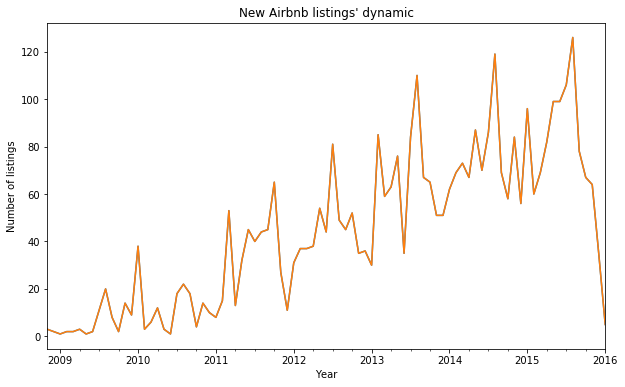

In [60]:
# Plot new Airbnb listings

df_to_plot = df_seattle_listings.reset_index()[['listing_id', 'host_since']]
month_year = df_to_plot.host_since.dt.to_period('M')
df_to_plot = df_to_plot.groupby(month_year).count().loc[:'2016-12']

df_to_plot.plot(legend=False, figsize=(10,6))
plt.title('New Airbnb listings\' dynamic')
plt.xlabel('Year')
plt.ylabel('Number of listings')
plt.show()

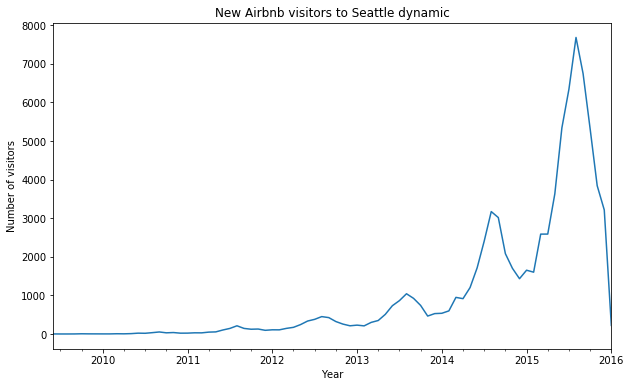

reviewer_id
review_date             
2015-08             7683
2015-09             6748
2015-07             6345
2015-06             5340
2015-10             5316

In [61]:
# Plot new Airbnb visitors to Seattle

df_to_plot = df_seattle_reviews.reset_index()[['review_date', 'reviewer_id']]
month_year = df_to_plot.review_date.dt.to_period('M')
df_to_plot = df_to_plot.groupby(month_year).agg({'reviewer_id': 'nunique'}).loc[:'2016-12']

df_to_plot.plot(legend=False, figsize=(10,6))
plt.title('New Airbnb visitors to Seattle dynamic')
plt.xlabel('Year')
plt.ylabel('Number of visitors')
plt.show()

df_to_plot.sort_values('reviewer_id', ascending=False).head()

Since 2014, the number of visiirs reviews has grown rapidly. One the reason could be more frequent use of Airbnb services. Perhaps this was due to lower prices.

Let's compare 2013 (low # of visitors), 2014 (average # of visitors), and 2015 (high # of visitors).

In [62]:
# Check whether low average prices caused the growth of reviews
# 2013

df_2013 = (df_combined[(df_combined.review_date >= '2013') & (df_combined.review_date < '2014') &
                         (df_combined.number_of_reviews > 0)].loc[:, ['review_date', 'price']])

df_2013.reset_index(drop=True, inplace=True)

round(df_2013.groupby('review_date').mean(), 1).sort_values('price').describe()

price
count  360.000000
mean   100.745833
std     15.390741
min     52.300000
25%     90.575000
50%    100.000000
75%    109.200000
max    193.500000

In [63]:
# Check whether low average prices caused the growth of reviews
# 2014

df_2014 = (df_combined[(df_combined.review_date >= '2014') & (df_combined.review_date < '2015') &
                         (df_combined.number_of_reviews > 0)].loc[:, ['review_date', 'price']])

df_2014.reset_index(drop=True, inplace=True)

round(df_2014.groupby('review_date').mean(), 1).sort_values('price').describe()

price
count  365.000000
mean   107.445479
std     11.732603
min     80.000000
25%     99.500000
50%    106.800000
75%    114.300000
max    144.700000

In [64]:
# Check whether low average prices caused the growth of reviews
# 2015

df_2015 = (df_combined[(df_combined.review_date >= '2015') & (df_combined.number_of_reviews > 0)]
             .loc[:, ['review_date', 'price']])

df_2015.reset_index(drop=True, inplace=True)

round(df_2015.groupby('review_date').mean(), 1).sort_values('price').describe()

price
count  368.000000
mean   108.154076
std      9.624517
min     86.700000
25%    102.275000
50%    107.450000
75%    114.125000
max    195.000000

In [65]:
# Average price without groupping by month

df_2013.price.mean(), df_2014.price.mean(), df_2015.price.mean()

(103.41952804860817, 110.31765283574761, 109.837942939525)

Here, it can be noted that most likely there was more than one reason for the increase in the number of reviews. For example, good advertising paid off or word of mouth worked. In this case, it is necessary to conduct a further study of the reasons for the growth of the visitors in comparison with the number listings.

In conclusion, it should be noted that in the period from 2009 to 2016 there is a general tendency to increase the number of new listings Airbnb Airbnb and the total number of visitors to Seattle.

### Question 2

**2.** What are the busiest times of the year to visit Seattle? By how much do prices spike?

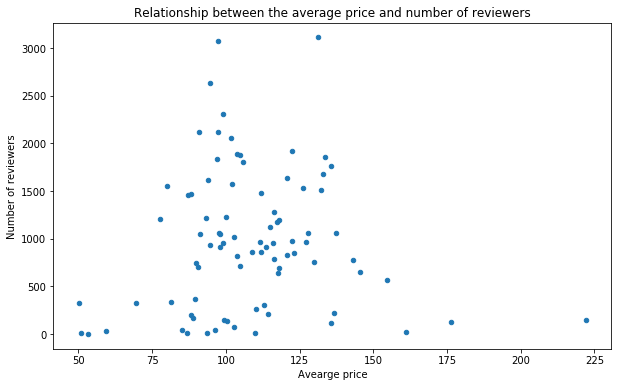

avg_price  reviewers
host_since                      
1               102.6        618
2               107.8        860
3               101.7        961
4               118.4       1042
5               104.9       1241
6               102.6        995
7               116.0       1400
8               100.3       1868
9               104.7        967
10              118.7        811
11              121.7        556
12              102.4        562

In [66]:
# Examine number of visitors and average prices by months during each year

bisy_in_combined = df_combined.copy()
bisy_in_combined.host_since = bisy_in_combined.host_since.dt.to_period('M')
bisy_in_combined = (bisy_in_combined.groupby('host_since').agg({'price': 'mean',
                                                                'reviewer_id': 'nunique'})).reset_index()

bisy_in_combined.columns = ['host_since', 'avg_price', 'reviewers']
bisy_in_combined.host_since = bisy_in_combined.host_since.dt.month

df_to_pot = bisy_in_combined.groupby('host_since').agg({'avg_price': 'mean', 'reviewers': 'mean'})
df_to_pot.avg_price = round(df_to_pot.avg_price, 1)
df_to_pot.reviewers = df_to_pot.reviewers.astype(int)

bisy_in_combined.plot(kind='scatter', x='avg_price', y='reviewers', figsize=(10,6))
plt.title('Relationship between the average price and number of reviewers')
plt.xlabel('Avearge price')
plt.ylabel('Number of reviewers')
plt.show()

df_to_pot

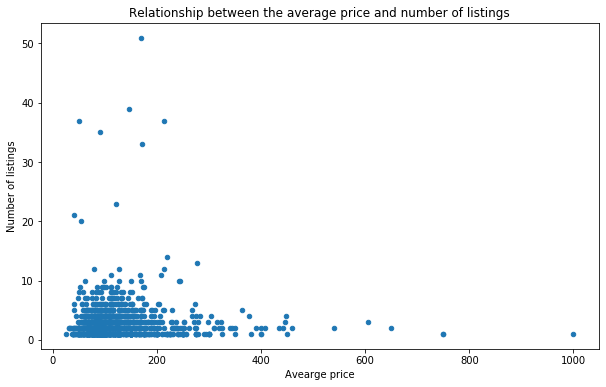

avg_price  listings
host_since                     
1               109.2         2
2               131.9         2
3               117.6         2
4               119.0         2
5               135.0         2
6               129.8         2
7               120.8         2
8               112.2         3
9               121.8         2
10              131.5         2
11              124.1         2
12              115.5         2

In [67]:
# Examine number of listings and average prices by months during each year

bisy_in_combined = df_combined.copy()
bisy_in_combined.host_since = bisy_in_combined.host_since.dt.to_period('M')
bisy_in_combined = df_combined.reset_index()
bisy_in_combined = (bisy_in_combined.groupby('host_since').agg({'price': 'mean',
                                                                'listing_id': 'nunique'})).reset_index()

bisy_in_combined.columns = ['host_since', 'avg_price', 'listings']
bisy_in_combined.host_since = bisy_in_combined.host_since.dt.month

df_to_pot = bisy_in_combined.groupby('host_since').agg({'avg_price': 'mean', 'listings': 'mean'})
df_to_pot.avg_price = round(df_to_pot.avg_price, 1)
df_to_pot.listings = df_to_pot.listings.astype(int)

bisy_in_combined.plot(kind='scatter', x='avg_price', y='listings', figsize=(10,6))
plt.title('Relationship between the average price and number of listings')
plt.xlabel('Avearge price')
plt.ylabel('Number of listings')
plt.show()

df_to_pot

calendar_date
2016-01    121.6
2016-02    124.3
2016-03    128.6
2016-04    135.1
2016-05    139.5
2016-06    147.5
2016-07    152.1
2016-08    150.7
2016-09    143.3
2016-10    137.0
2016-11    135.7
2016-12    137.3
Freq: M, Name: True, dtype: float64


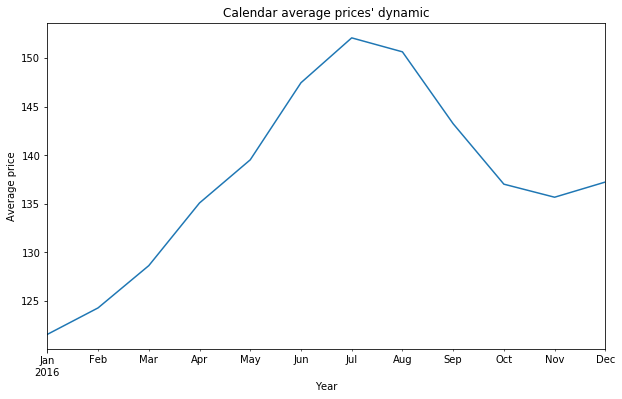

In [68]:
# Look at future prices (df_seattle_calendar data)

month_year = df_seattle_calendar.calendar_date.dt.to_period('M')
bisy_in_calendar = df_seattle_calendar.pivot_table(index=month_year, columns='available',
                                values='calendar_price', aggfunc='mean').loc[:'2016-12 ', True]

print(round(bisy_in_calendar, 1))

bisy_in_calendar.plot(legend=False, figsize=(10,6))
plt.title('Calendar average prices\' dynamic')
plt.xlabel('Year')
plt.ylabel('Average price')
plt.show()

The busiest times of the year to visit Seattle are July and August. Not surprisingly, in summer the largest number of visitors. So in August, an average of 1868 reviews, and in July - 1400. At the same time, according to the law of demand, the larger the number of visitors, the lower the price. This works for August, but not for July. The average price for the period under review is 109 dollars, the number of reviewers is 959 people, in August this price drops to the minimum average price for all Augusts - 100.3 dollars. And the average price in July is 116.0 dollars, although this price should be between 109 dollars (for the entire period) and 100 dollars (in August). Thus, it turns out that there are other factors, for example, a small limited number of proposals in July.

It should be added that if we consider listings, then the law of the proposal is respected, outliers are present in the data. Monthly average listing prices are on average higher by 14 dollars than reviewers.

If we look at calendar average prices then we see that in summer months prices are highest for all of 2016. Maximum average price is in July - 152.1 dollars.

### Question 3

**3.** Understand if there is anything about the properties that helps you predict price.

In [69]:
df_seattle_listings.head()

summary  space  neighborhood_overview  notes  transit host_since  \
listing_id                                                                     
4291              0      1                      0      0        0 2009-09-02   
5682              1      1                      0      1        1 2009-03-03   
6606              0      1                      1      1        0 2009-04-26   
7369              1      1                      1      1        1 2009-05-30   
9419              1      1                      1      1        1 2009-08-09   

            host_about  host_response_rate  host_acceptance_rate  \
listing_id                                                         
4291                 1            1.000000              1.000000   
5682                 1            1.000000              1.000000   
6606                 1            0.900000              1.000000   
7369                 1            0.948868              0.999672   
9419                 1            1.000000              1.000000   

           host_is_superhost  host_listings_count  host_has_profile_pic  \
listing_id                                                                
4291                   False                  6.0                  True   
5682                   False                  1.0                  True   
6606                   False                  3.0                  True   
7369                   False                  1.0                  True   
9419                   False                  5.0                  True   

            host_identity_verified zipcode  is_location_exact  accommodates  \
listing_id                                                                    
4291                          True   98115              False             2   
5682                          True   98106               True             2   
6606                          True   98103               True             2   
7369                         False   98122               True             2   
9419                          True   98108               True             2   

            bathrooms  bedrooms  beds  price  weekly_price  cleaning_fee  \
listing_id                                                                 
4291              1.0       1.0   1.0   82.0             1             1   
5682              1.0       1.0   1.0   48.0             1             1   
6606              1.0       1.0   1.0   90.0             1             1   
7369              1.0       1.0   1.0   85.0             0             0   
9419              3.0       1.0   1.0   90.0             1             0   

            guests_included  extra_people  minimum_nights  maximum_nights  \
listing_id                                                                  
4291                      1           0.0               2              60   
5682                      1           5.0               3              28   
6606                      2          10.0               2            1125   
7369                      1           0.0               1            1125   
9419                      1          10.0               2              30   

            availability_30  availability_90  availability_365  \
listing_id                                                       
4291                     30               90               365   
5682                     12               46               309   
6606                     30               90               365   
7369                      3               53                53   
9419                     30               90               365   

            number_of_reviews  review_scores_rating  instant_bookable  \
listing_id                                                              
4291                       35                  92.0             False   
5682                      297                  96.0              True   
6606                       52                  93.0             Fa

In [70]:
df_seattle_listings.shape

(3815, 96)

In [71]:
# Drop columns which are highly correlated with other columns

temp = df_seattle_listings.corr()
cnt = 0
for col in temp.columns:
    top_2 = temp.sort_values(col, ascending=False).head(2)[col].values.sum()
    if top_2 > 1.8:
        print(col, '\n', )
        df_seattle_listings.drop(col, axis=1, inplace=True)
        cnt += 1
cnt

accommodates 

beds 

availability_30 

availability_90 

require_guest_profile_picture 

require_guest_phone_verification 



6

In [72]:
# Drop columns with only one value

for col in df_seattle_listings.columns:
    one_val = len(df_seattle_listings[col].unique())
    if one_val == 1:
        print(col)
        df_seattle_listings.drop(col, axis=1, inplace=True)

In [73]:
# Create features and target arrays, split into train and test

y = df_seattle_listings.price
X = df_seattle_listings.drop(['price', 'host_since', 'zipcode'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

print('Shape X_train:', X_train.shape)
print('Shape X_test:', X_test.shape)
print('Shape y_train:', y_train.shape)
print('Shape y_test:', y_test.shape)

Shape X_train: (2670, 87)
Shape X_test: (1145, 87)
Shape y_train: (2670,)
Shape y_test: (1145,)


In [74]:
# LinearRegression

lm = LinearRegression().fit(X_train, y_train)

print('Accuracy of LinearRegression on training set: {:.2f}'
     .format(lm.score(X_train, y_train)))
print('Accuracy of LinearRegression on test set: {:.2f}'
     .format(lm.score(X_test, y_test)))

Accuracy of LinearRegression on training set: 0.56
Accuracy of LinearRegression on test set: 0.50


In [75]:
# Lasso

lin = Lasso(alpha=0.0001,precompute=True,max_iter=1000, positive=True, random_state=9999, selection='random')
lin.fit(X_train, y_train)

print('Accuracy of LinearRegression on training set: {:.2f}'
     .format(lin.score(X_train, y_train)))
print('Accuracy of LinearRegression on test set: {:.2f}'
     .format(lin.score(X_test, y_test)))

Accuracy of LinearRegression on training set: 0.48
Accuracy of LinearRegression on test set: 0.51


In [76]:
# LassoCV

lin = LassoCV(alphas=np.logspace(-6, -3, 7), max_iter=100000, cv=5, fit_intercept=False, positive=True)
lin.fit(X_train, y_train)

print('Accuracy of LinearRegression on training set: {:.2f}'
     .format(lin.score(X_train, y_train)))
print('Accuracy of LinearRegression on test set: {:.2f}'
     .format(lin.score(X_test, y_test)))

Accuracy of LinearRegression on training set: 0.47
Accuracy of LinearRegression on test set: 0.51


In [77]:
# Ridge

ridge = Ridge(alpha=.5)
ridge.fit(X_train, y_train)

print('Accuracy of LinearRegression on training set: {:.2f}'
     .format(ridge.score(X_train, y_train)))
print('Accuracy of LinearRegression on test set: {:.2f}'
     .format(ridge.score(X_test, y_test)))

Accuracy of LinearRegression on training set: 0.56
Accuracy of LinearRegression on test set: 0.49


In [78]:
# RidgeCV

ridge = RidgeCV(alphas=np.logspace(-6, 6, 13))
ridge.fit(X_train, y_train)

print('Accuracy of LinearRegression on training set: {:.2f}'
     .format(ridge.score(X_train, y_train)))
print('Accuracy of LinearRegression on test set: {:.2f}'
     .format(ridge.score(X_test, y_test)))

Accuracy of LinearRegression on training set: 0.54
Accuracy of LinearRegression on test set: 0.44


In [80]:
# Create features and target arrays, split into train and test (use SelectFromModel)

y = df_seattle_listings.price
X = df_seattle_listings.drop(['price', 'host_since', 'zipcode'], axis=1)

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_  
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=.3)

print('Shape X_train:', X_train.shape)
print('Shape X_test:', X_test.shape)
print('Shape y_train:', y_train.shape)
print('Shape y_test:', y_test.shape)

Shape X_train: (2670, 31)
Shape X_test: (1145, 31)
Shape y_train: (2670,)
Shape y_test: (1145,)


In [81]:
# LinearRegression

lm = LinearRegression().fit(X_train, y_train)

print('Accuracy of LinearRegression on training set: {:.2f}'
     .format(lm.score(X_train, y_train)))
print('Accuracy of LinearRegression on test set: {:.2f}'
     .format(lm.score(X_test, y_test)))

Accuracy of LinearRegression on training set: 0.49
Accuracy of LinearRegression on test set: -807.18


In [82]:
# Create features and target arrays, split into train and test (use ExtraTreesClassifier)

y = df_seattle_listings.price
X = df_seattle_listings.drop(['price', 'host_since', 'zipcode'], axis=1)

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_  
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=.3)

print('Shape X_train:', X_train.shape)
print('Shape X_test:', X_test.shape)
print('Shape y_train:', y_train.shape)
print('Shape y_test:', y_test.shape)

Shape X_train: (2670, 31)
Shape X_test: (1145, 31)
Shape y_train: (2670,)
Shape y_test: (1145,)


In [83]:
# LinearRegression

lm = LinearRegression().fit(X_train, y_train)

print('Accuracy of LinearRegression on training set: {:.2f}'
     .format(lm.score(X_train, y_train)))
print('Accuracy of LinearRegression on test set: {:.2f}'
     .format(lm.score(X_test, y_test)))

Accuracy of LinearRegression on training set: 0.49
Accuracy of LinearRegression on test set: -844.91


Unfortunately, my attempt failed. Any linear model predictes +-50% => in the same way as tossing a coin. I find nothing about properties that help predict the price.